In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [68]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [69]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[ 108.98381805]]


In [70]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [71]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2018, 1, 1)
tesla = quandl.get('WIKI/TSLA',start_date=start,end_date=end)

In [72]:
tesla.tail(3)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-27,316.00,317.68,310.75,311.64,4645441.0,0.0,1.0,316.00,317.68,310.75,311.64,4645441.0
2017-12-28,311.75,315.82,309.54,315.36,4294689.0,0.0,1.0,311.75,315.82,309.54,315.36,4294689.0
2017-12-29,316.18,316.41,310.00,311.35,3727621.0,0.0,1.0,316.18,316.41,310.00,311.35,3727621.0


In [73]:
raw_seq=tesla['Adj. Close'].values

In [74]:
raw_seq.shape

(1508,)

In [75]:
Minmax= StandardScaler()

In [10]:
data = Minmax.fit_transform(raw_seq.reshape(-1,1))

In [11]:
data

array([[-1.61303629],
       [-1.61682651],
       [-1.62287037],
       ..., 
       [ 1.29170502],
       [ 1.32981208],
       [ 1.28873431]])

In [76]:
X, y = split_sequence(raw_seq, n_steps)

In [77]:
X.shape ,X.reshape(1505,3).shape, y.shape, y.reshape(1505).shape

((1505, 3), (1505, 3), (1505,), (1505,))

In [78]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [79]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [80]:
history=model.fit(X_train, y_train, epochs=200, verbose=2, validation_split=0.15, shuffle=False)

Train on 1023 samples, validate on 181 samples
Epoch 1/200
 - 0s - loss: 9961.8083 - val_loss: 3649.9830
Epoch 2/200
 - 0s - loss: 92.9572 - val_loss: 69.6276
Epoch 3/200
 - 0s - loss: 49.5015 - val_loss: 47.7053
Epoch 4/200
 - 0s - loss: 38.5054 - val_loss: 47.1923
Epoch 5/200
 - 0s - loss: 36.3359 - val_loss: 47.1794
Epoch 6/200
 - 0s - loss: 36.4907 - val_loss: 47.1694
Epoch 7/200
 - 0s - loss: 36.2590 - val_loss: 47.0856
Epoch 8/200
 - 0s - loss: 36.3518 - val_loss: 47.0586
Epoch 9/200
 - 0s - loss: 36.2783 - val_loss: 46.9871
Epoch 10/200
 - 0s - loss: 36.2999 - val_loss: 46.9377
Epoch 11/200
 - 0s - loss: 36.2677 - val_loss: 46.8706
Epoch 12/200
 - 0s - loss: 36.2619 - val_loss: 46.8080
Epoch 13/200
 - 0s - loss: 36.2414 - val_loss: 46.7387
Epoch 14/200
 - 0s - loss: 36.2262 - val_loss: 46.6681
Epoch 15/200
 - 0s - loss: 36.2077 - val_loss: 46.5940
Epoch 16/200
 - 0s - loss: 36.1894 - val_loss: 46.5172
Epoch 17/200
 - 0s - loss: 36.1707 - val_loss: 46.4377
Epoch 18/200
 - 0s - lo

Epoch 149/200
 - 0s - loss: 30.8042 - val_loss: 32.2194
Epoch 150/200
 - 0s - loss: 30.8036 - val_loss: 32.1797
Epoch 151/200
 - 0s - loss: 30.8009 - val_loss: 32.1404
Epoch 152/200
 - 0s - loss: 30.7960 - val_loss: 32.1022
Epoch 153/200
 - 0s - loss: 30.7875 - val_loss: 32.0615
Epoch 154/200
 - 0s - loss: 30.7821 - val_loss: 32.0252
Epoch 155/200
 - 0s - loss: 30.7735 - val_loss: 31.9885
Epoch 156/200
 - 0s - loss: 30.7631 - val_loss: 31.9519
Epoch 157/200
 - 0s - loss: 30.7518 - val_loss: 31.9159
Epoch 158/200
 - 0s - loss: 30.7397 - val_loss: 31.8803
Epoch 159/200
 - 0s - loss: 30.7271 - val_loss: 31.8456
Epoch 160/200
 - 0s - loss: 30.7139 - val_loss: 31.8113
Epoch 161/200
 - 0s - loss: 30.7003 - val_loss: 31.7777
Epoch 162/200
 - 0s - loss: 30.6865 - val_loss: 31.7447
Epoch 163/200
 - 0s - loss: 30.6724 - val_loss: 31.7123
Epoch 164/200
 - 0s - loss: 30.6581 - val_loss: 31.6805
Epoch 165/200
 - 0s - loss: 30.6438 - val_loss: 31.6494
Epoch 166/200
 - 0s - loss: 30.6296 - val_loss: 

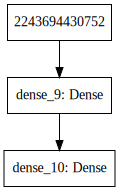

In [81]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [82]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'MLP_uni_tesla' + mytime 

In [83]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 100)

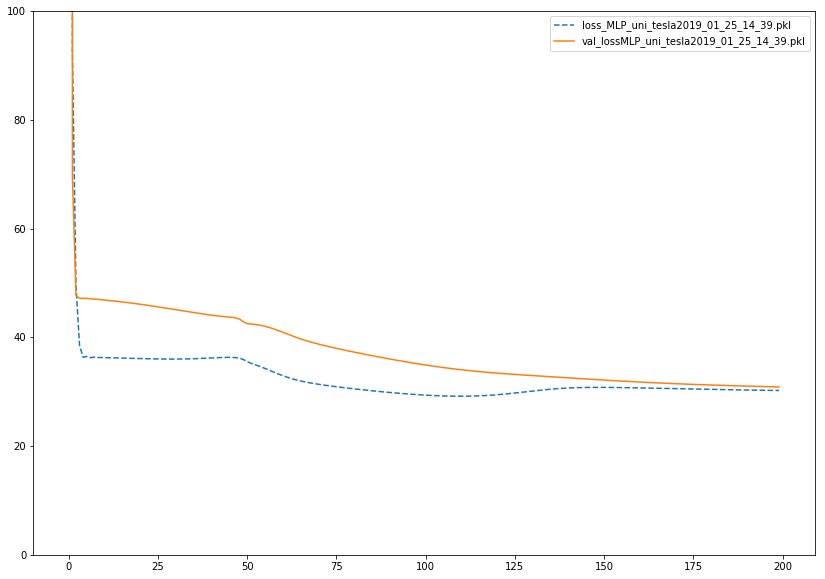

In [84]:
histories = ['MLP_uni_tesla2019_01_25_14_39.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 100)

In [85]:
yhat = model.predict(X_test, verbose=2)

In [87]:
X_test[-1]

array([ 317.29,  311.64,  315.36])

In [25]:
#ypred=Minmax.inverse_transform(yhat)
#yreal=Minmax.inverse_transform(y_test.reshape(301,1))

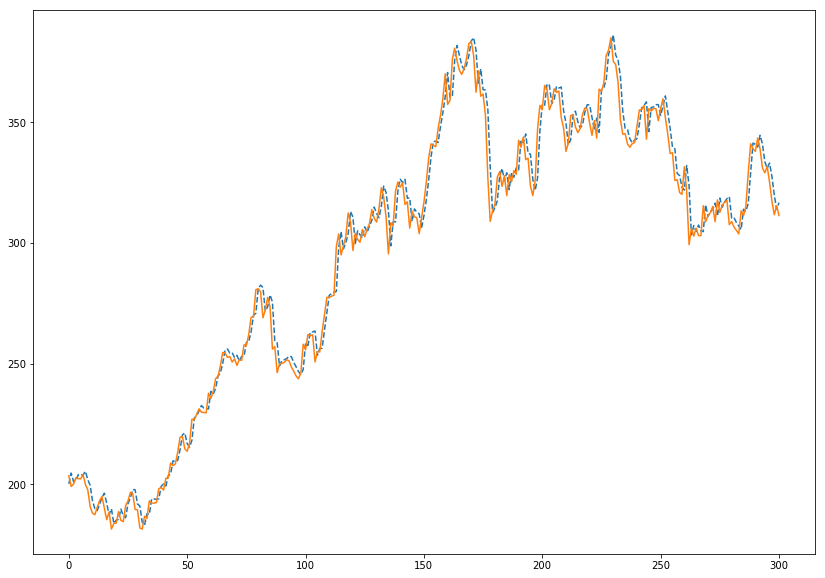

In [88]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(yhat,label ='prediction' ,linestyle='--')
plt.plot(y_test,label='real' )

In [89]:
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
r2_score(y_test, yhat) 

0.98624953251960079

In [91]:
mean_squared_error(y_test, yhat) 

46.492745654556487

In [92]:
test=y_test[-4:-1]

In [93]:
test

array([ 317.29,  311.64,  315.36])

In [94]:
y_test[-5:]

array([ 325.2 ,  317.29,  311.64,  315.36,  311.35])

In [96]:
test=test.reshape(1,3)

In [97]:
y = model.predict(test, verbose=2)

In [98]:
y


array([[ 316.6600647]], dtype=float32)